# Consistencey Test, Compare to Gupta 2011

We rerun the age estimates on the objects analayed by Gupta et al. 2001 and see what if any significant changes their are. We uesed the 76 objects from Gupta that fit our quality cuts.

## Getting started

In [1]:
import numpy as np
from astropy.table import Table

In [2]:
from astropy.table import join

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filepath = '../resources/ages_gupta.tsv'
RoseData = Table.read(filepath, format='ascii.commented_header', delimiter='\t')
RoseData['sn id'] = RoseData['sn id'].astype(int)    # Convert SN ID from float

In [5]:
filepath = '../data/Gupta11_table2.txt'
GuptaData = Table.read(filepath, format='ascii.csv', delimiter='\t', 
                       header_start=2, data_start=3, fill_values = ('...', 'np.nan'))
#Note ascii.commented_header NEEDS commented lines?
#This maskes the cells that were '...'

# Verrify the correct data points

Not needed, the `join` takes care of this section

In [6]:
print(len(GuptaData))
print(len(RoseData))

206
76


In [7]:
GuptaData[:5]

SN ID,IAU,RA,Dec,redshift,redshift uncert,M -,M,M +,Age -,Age,Age +,c,c uncert,x_1,x_1 uncert,HR,HR uncert
int64,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1166,--,9.3552761078,0.9739487767,0.3824,0.0005,11.08,11.15,11.22,4.13,6.47,7.53,0.023,0.068,1.274,1.103,-0.3288,0.2179
1253,2005fd,323.798583984,0.1628694236,0.262,0.005,11.27,11.34,11.39,5.89,7.8,8.03,-0.119,0.058,-1.28,0.464,-0.1097,0.1611
1371,2005fh,349.373748779,0.4296737611,0.11915,0.00012,10.95,11.0,11.02,5.27,6.76,7.26,-0.084,0.02,0.703,0.167,-0.1775,0.0566
1580,2005fb,45.3238296509,-0.6422790885,0.183,8e-05,10.61,10.73,10.83,3.58,5.2,6.95,-0.058,0.026,0.675,0.271,-0.1156,0.0775
1688,--,321.357818603,0.3248503506,0.3587,0.0005,10.09,10.2,10.32,1.5,2.04,2.74,0.007,0.07,1.019,1.306,0.024,0.2309


In [8]:
RoseData[:5]

sn id,age,lower limit,upper limit
int64,float64,float64,float64
16100,4.9903750786,3.43530574986,6.95231747053
18241,8.20487376491,2.18804679709,10.121954036
12950,1.87043908319,1.46766769314,2.34727144527
3256,4.88380305539,2.31839784584,7.0813903827
18650,2.10091204475,1.32246764757,3.39300962638


## Combine into one table

Combining into one table forces them to allow for 

In [9]:
RoseData.rename_column('sn id', 'SN ID')
data = join(RoseData, GuptaData[['SN ID', 'Age', 'Age +', 'Age -']] , keys='SN ID')
data[:5]

SN ID,age,lower limit,upper limit,Age,Age +,Age -
int64,float64,float64,float64,float64,float64,float64
1371,8.19892209654,6.20933453675,9.60747258693,6.76,7.26,5.27
1580,5.07953907697,4.35865392406,6.28956597428,5.2,6.95,3.58
2372,6.49784686829,4.79727692375,7.30872912604,7.64,8.81,6.08
2635,2.46063507621,1.74941560364,3.58135931887,4.73,6.0,3.35
3080,5.05365373544,4.1371937691,6.06472514562,4.87,4.87,3.67


# Make plots

In [10]:
# sns.set_style("whitegrid")
from scipy.stats import spearmanr, pearsonr

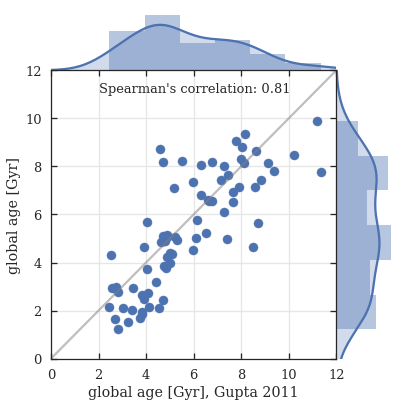

In [11]:
sns.set(context='talk', style='ticks', font='serif', color_codes=True)

#'rug':True in marginal_kws, makes it very slow and looks like a solid line
g = sns.jointplot(x=data['Age'], y=data['age'], stat_func=spearmanr, kind="scatter",
                  xlim=(0,12), ylim=(0,12), space=0,
                  marginal_kws={'bins':6, 'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}}
                 )
g.ax_joint.plot(np.linspace(0,12), np.linspace(0,12), alpha=0.5, c='grey')

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="best", fontsize=13, 
               template="{stat}: {val:.2f}")
# it looks like <abs(0.3) for spearman r is not very correlated.

g = g.set_axis_labels('global age [Gyr], Gupta 2011', 'global age [Gyr]')


g.ax_joint.tick_params(axis='both', direction='in')
g.ax_joint.grid(which='major', axis='both', color='0.90', linestyle='-')

plt.savefig('ageCalibration_roseVgupta.pdf')
plt.show()

## Discussion

In [15]:
pearsonr(data['Age'], data['age'])  # not that different than Spearman R, so it is very linear relationship.

(0.79900015727631479, 5.1823408482885955e-18)

### Looking at Uncertanties

In [24]:
yerr = ((data['age'] - data['lower limit']) + (data['upper limit']- data['age']))/2  # Rose Data
xerr = ((data['Age'] - data['Age -']) + (data['Age +']-data['Age']))/2     # Gupta Data

In [25]:
print('Rose 2018')
print(np.median(yerr))
print(np.median(np.abs(yerr - np.median(yerr))))

print('\nGupta 2011')
print(np.median(xerr))
print(np.median(np.abs(xerr - np.median(xerr))))

Rose 2018
1.28955972595
0.495512608619

Gupta 2011
1.37
0.3125


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [26]:
print('Rose 2018')
print(np.mean(yerr))
print(np.std(yerr))

print('\nGupta 2011')
print(np.mean(xerr))
print(np.std(xerr))

Rose 2018
1.87433117398
1.25971342738

Gupta 2011
1.26210526316
0.607253991319


Since Rose 2018 has "worse" mean and standard diviation values but very simmiar (or better) median baised values, it appears that Rose 2018 has some "outliers". This can be explained by the two population populations. This produces a very asysmetric error bar, and hence more "outliers" from Gaussian untertainities.

### Does Rose estimate a younger population?

In [28]:
print("Number of objects less then 2 Gyr old")
print("Rose 2018: ",len(data[data['age']<2]))
print("Gupta 2011: ",len(data[data['Age']<2]))

Number of objects less then 2 Gyr old
Rose 2018:  6
Gupta 2011:  0


In [34]:
print("Number of objects **minimum age** less then 2 Gyr old")
print("Rose 2018: ", len(data[data['lower limit']<2]))
print("Gupta 2011: ",len(data[data['Age -']<2]))

Number of objects **minimum age** less then 2 Gyr old
Rose 2018:  29
Gupta 2011:  0


In [36]:
print("Number of objects **minimum age** less then 1.5 Gyr old")
print("Rose 2018: ",len(data[(data['lower limit'])<1.5]))
print("Gupta 2011: ",len(data[data['Age -']<1.5]))

Number of objects **minimum age** less then 1.5 Gyr old
Rose 2018:  10
Gupta 2011:  0


In [37]:
min(data['lower limit'])

0.95261550081960933

Rose definately has these young (less than 3 Gyr) population as younger than Gupta. This is evident by the six environments that are less than 2 Gyrs old and the lowest lower limit being less than 1 Gyr.

extra stuff that does not matter.

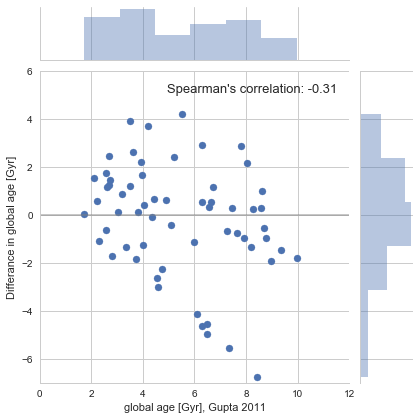

In [60]:
# fig = plt.figure()

g = (sns.jointplot(x=data['Age'], y=data['age']-data['Age'], stat_func=spearmanr, kind="scatter", marginal_kws={'bins':6}, xlim=(0,12), ylim=(-7,6))
    ).set_axis_labels('global age [Gyr], Gupta 2011', 'Differance in global age [Gyr]')

g.ax_joint.plot(np.linspace(0,12), [0]*50, alpha=0.5, c='grey')

g = g.annotate(spearmanr, stat="Spearman's correlation",
               loc="best", fontsize=13, 
               template="{stat}: {val:.2f}")


# plt.savefig('ageCalibration_residual.pdf')
plt.show()

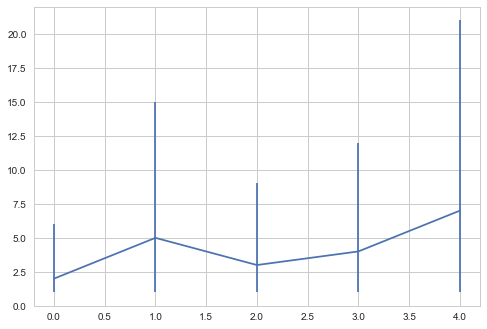

In [135]:
plt.figure('test')
plt.errorbar(range(5), [2,5,3,4,7], yerr=[[1,4,2,3,6],[4,10,6,8,14]])
plt.show()

In [68]:
plt.figure('calibration1')
# plt.xscale('log', nonposy='clip')
# plt.yscale('log', nonposy='clip')
plt.errorbar(GuptaData['Age'], RoseData['age'], xerr=xerr, yerr=yerr, fmt='.', alpha=0.25)
plt.errorbar(GuptaData['Age'][xerr<1], RoseData['age'][xerr<1], xerr=xerr[xerr<1], yerr=yerr[xerr<1], fmt='.', alpha=0.75)
# sns.regplot(x=GuptaData['Age'], y=RoseData['age'])
# sns.jointplot(x=GuptaData['Age'], y=RoseData['age'], kind="reg")
plt.xlabel('Age [Gyr] - Gupta 2011')
plt.ylabel('Age [Gyr] - Rose 2017')
plt.plot(np.linspace(0,12), np.linspace(0,12))
plt.plot(np.linspace(0,12), np.linspace(0,12)-2.0)
plt.savefig('figures/ageCalibration_temp.pdf')
plt.show()

KeyError: 'age'

In [64]:
GuptaData

SN ID,IAU,RA,Dec,redshift,redshift uncert,M -,M,M +,Age -,Age,Age +,c,c uncert,x_1,x_1 uncert,HR,HR uncert
int64,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1166,--,9.3552761078,0.9739487767,0.3824,0.0005,11.08,11.15,11.22,4.13,6.47,7.53,0.023,0.068,1.274,1.103,-0.3288,0.2179
1253,2005fd,323.798583984,0.1628694236,0.262,0.005,11.27,11.34,11.39,5.89,7.8,8.03,-0.119,0.058,-1.28,0.464,-0.1097,0.1611
1371,2005fh,349.373748779,0.4296737611,0.11915,0.00012,10.95,11.0,11.02,5.27,6.76,7.26,-0.084,0.02,0.703,0.167,-0.1775,0.0566
1580,2005fb,45.3238296509,-0.6422790885,0.183,8e-05,10.61,10.73,10.83,3.58,5.2,6.95,-0.058,0.026,0.675,0.271,-0.1156,0.0775
1688,--,321.357818603,0.3248503506,0.3587,0.0005,10.09,10.2,10.32,1.5,2.04,2.74,0.007,0.07,1.019,1.306,0.024,0.2309
2017,2005fo,328.943878174,0.5934827328,0.2616,0.0005,10.48,10.54,10.57,4.26,5.84,6.66,-0.117,0.052,1.272,0.527,0.2671,0.1512
2165,2005fr,17.0916309357,-0.0962756798,0.288,0.005,9.33,9.39,9.46,1.86,2.21,3.52,-0.13,0.038,0.62,0.526,0.3219,0.1315
2330,2005fp,6.8073453903,1.1208769083,0.2132,0.0005,9.83,9.88,9.94,2.8,4.11,6.16,0.083,0.063,-2.238,0.569,0.2954,0.162
2372,2005ft,40.520816803,-0.5410116911,0.1805,0.0005,10.37,10.45,10.49,6.08,7.64,8.81,0.045,0.024,-0.015,0.225,-0.1379,0.0714


In [65]:
RoseData

SN,age,age-uncert,age+uncert
int64,float64,float64,float64
1166,2.24726963043,1.04496121407,0.502037227154
1253,3.18795919418,1.79519927502,1.32779455185
1371,0.0182669144124,0.00122318579815,0.000929805915803
1580,0.0065697375685,0.000385548250051,0.000431691121776
1688,0.58418571949,0.0444331504405,0.0397054851055
2017,1.64341855049,0.0973108559847,0.0833257585764
2165,1.40117573738,0.773038029671,0.679863572121
2330,0.00938008446246,0.0612789280713,0.00525784539059
2372,1.84734380245,0.241433665156,0.230671390891


In [70]:
for i in GuptaData['SN ID']:
    if len(np.where(RoseData['SN'] == i)[0]) == 0:
        print(i)

13956


There are those two data points that are "high quality" by Gupta's defintion, but I disagree with the resulting age by 8 to 10 Gyr! What host are they?

In [131]:
GuptaData[np.logical_and(GuptaData['Age'] > 10, GuptaData['Age'] - GuptaData['Age -'] < 1)]

SN ID,IAU,RA,Dec,redshift,redshift uncert,M -,M,M +,Age -,Age,Age +,c,c uncert,x_1,x_1 uncert,HR,HR uncert
int64,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
12781,2006er,5.4078617096,-1.0106090307,0.08431,0.00016,10.96,10.97,11.02,10.58,11.18,11.58,0.072,0.061,-2.128,0.337,0.1604,0.1149
15776,2006na,32.8302955627,-0.9981175065,0.305,0.005,11.18,11.19,11.21,9.81,10.21,10.21,-0.116,0.081,-1.662,0.743,0.1115,0.2089
